In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy
from pylab import rcParams
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [ ]:
help("modules")


Please wait a moment while I gather a list of all available modules...



C:\Users\user\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
C:\Users\user\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,
C:\Users\user\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\user\Anaconda3\lib\site-packages\glue_vispy_viewers\extern\vispy\app\backends\ipython\_widget.py:7: UserWarning: IPython.utils.trai

In [6]:
train.shape

(1460, 81)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.MSZoning.unique().sum()

'RLRMC (all)FVRH'

In [519]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [520]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [521]:
def na_percent(df):
    for col in df.columns:
        missing = df[col].isnull().sum()
        n = len(df[col])
        percent = (missing/n)*100
        na_pcnt = [col,percent]
        print(na_pcnt)

In [522]:
na_percent(train)

['Id', 0.0]
['MSSubClass', 0.0]
['MSZoning', 0.0]
['LotFrontage', 17.73972602739726]
['LotArea', 0.0]
['Street', 0.0]
['Alley', 93.76712328767123]
['LotShape', 0.0]
['LandContour', 0.0]
['Utilities', 0.0]
['LotConfig', 0.0]
['LandSlope', 0.0]
['Neighborhood', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['BldgType', 0.0]
['HouseStyle', 0.0]
['OverallQual', 0.0]
['OverallCond', 0.0]
['YearBuilt', 0.0]
['YearRemodAdd', 0.0]
['RoofStyle', 0.0]
['RoofMatl', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['MasVnrType', 0.547945205479452]
['MasVnrArea', 0.547945205479452]
['ExterQual', 0.0]
['ExterCond', 0.0]
['Foundation', 0.0]
['BsmtQual', 2.5342465753424657]
['BsmtCond', 2.5342465753424657]
['BsmtExposure', 2.6027397260273974]
['BsmtFinType1', 2.5342465753424657]
['BsmtFinSF1', 0.0]
['BsmtFinType2', 2.6027397260273974]
['BsmtFinSF2', 0.0]
['BsmtUnfSF', 0.0]
['TotalBsmtSF', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['CentralAir', 0.0]
['Electrical', 0.0684931506849315]
['1stFlrSF', 0.0]
['2

In [523]:
full = pd.concat([train,test])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [524]:
full.shape

(2919, 81)

In [525]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [526]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['Alley', 93.21685508735868]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 2.8091812264474134]
['BsmtExposure', 2.8091812264474134]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 2.7064063035286057]
['BsmtFinType2', 2.7406646111682083]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 2.774922918807811]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0342583076396026]
['Exterior2nd', 0.0342583076396026]
['Fence', 80.4385063377869]
['FireplaceQu', 48.646796848235695]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968

In [527]:
full = full.loc[:, full.isnull().sum() < 0.4*full.shape[0]]

In [528]:
full.shape

(2919, 75)

In [529]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [530]:
def facet(feature):
    facet=sns.FacetGrid(train,aspect=5)
    facet.map(sns.kdeplot,feature,shade=True)
    facet.set(xlim=(0,train[feature].max()))
    facet.add_legend()
    plt.show()


In [531]:
def bar(feature):
    total = train[train[feature]].value_counts().plot(kind='bar', stacked=False, figsize=(10,5)) 

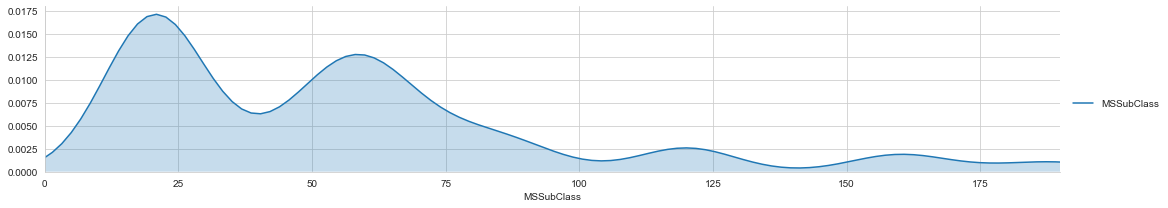

In [532]:
facet('MSSubClass')

In [533]:
pd.unique(train['MSSubClass'])

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

### Checking for missing values

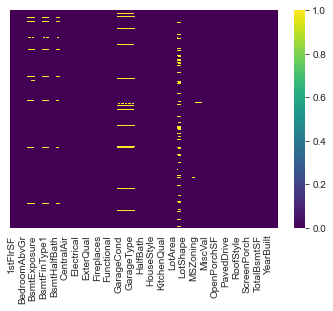

In [534]:
sns.heatmap(full.isnull(),yticklabels=False,cbar=True,cmap='viridis')

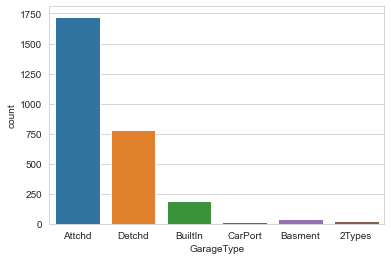

In [535]:
sns.set_style('whitegrid')
sns.countplot(x="GarageType", data=full)

In [536]:
full["GarageType"].isnull().sum()

157

In [537]:
pd.crosstab([full.BldgType,full.LotShape] ,full.GarageType, margins=True)

GarageType         2Types  Attchd  Basment  BuiltIn  CarPort  Detchd   All
BldgType LotShape                                                         
1Fam     IR1            3     619       11       94        3     109   839
         IR2            0      49        0        9        0       9    67
         IR3            0       6        0        6        0       2    14
         Reg           12     793       18       61        3     521  1408
2fmCon   IR1            1       2        0        0        1       3     7
         Reg            2      10        0        1        1      22    36
Duplex   IR1            2       7        0        1        1       9    20
         IR2            0       0        0        0        1       0     1
         Reg            3      21        0        3        3      30    60
Twnhs    IR1            0       3        0        0        0       0     3
         Reg            0      26        1        9        1      46    83
TwnhsE   IR1            0      75        0        0        0       2    77
         IR2            0       7        0        0        0       1     8
         IR3            0       1        0        0        0       0     1
         Reg            0     104        6        2        1      25   138
All                    23    1723       36      186       15     779  2762

In [538]:
full.GarageType = full.GarageType.fillna(full.BldgType)


In [539]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [540]:
pd.set_option('max_columns', 100)

full.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
Utilities       2
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 75, dtype: int64

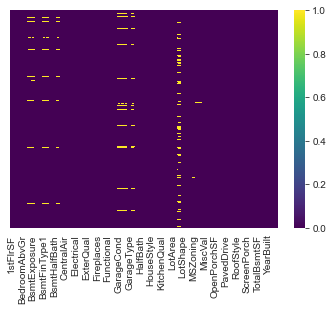

In [541]:
sns.heatmap(full.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [542]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [543]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [544]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 2.8091812264474134]
['BsmtExposure', 2.8091812264474134]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 2.7064063035286057]
['BsmtFinType2', 2.7406646111682083]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 2.774922918807811]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0342583076396026]
['Exterior2nd', 0.0342583076396026]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.447070914696813

In [545]:
full.MSZoning.isnull().sum()

4

In [546]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


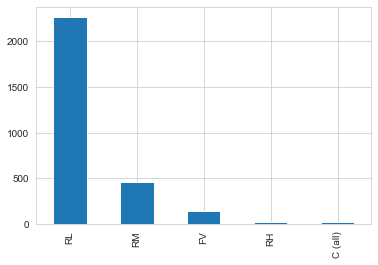

In [547]:
full.MSZoning.value_counts().plot(kind='bar')

In [548]:
full.MSZoning = full.MSZoning.fillna("RL")

In [549]:
full.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [550]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [551]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [552]:
full.LotFrontage.mean()

69.30579531442663

In [553]:
full.LotFrontage = full.LotFrontage.fillna(69.306)

In [554]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [555]:
full.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [556]:
full.shape

(2919, 75)

In [557]:
full.Utilities = full.Utilities.fillna('AllPub')

In [558]:
pd.unique(full.Exterior1st)

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [559]:
full.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [560]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [561]:
full[full.Exterior1st.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
691,1518,0,0,2,1Fam,TA,Gd,1035.0,0.0,ALQ,Unf,1.0,0.0,TA,545.0,Y,Norm,Norm,SBrkr,0,TA,TA,NaN,NaN,2,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,1Fam,NaN,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,85.0,Reg,0,30,RL,0.0,None,0,1,Edwards,39,7,5,Y,0,Tar&Grv,Flat,Normal,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


In [562]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [563]:
full.iloc[691,:]

1stFlrSF          2444
2ndFlrSF          1872
3SsnPorch            0
BedroomAbvGr         4
BldgType          1Fam
                 ...  
Utilities       AllPub
WoodDeckSF         382
YearBuilt         1994
YearRemodAdd      1995
YrSold            2007
Name: 691, Length: 75, dtype: object

In [564]:
full.Exterior1st = full.Exterior1st.fillna("VinylSd")

In [565]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 2.8091812264474134]
['BsmtExposure', 2.8091812264474134]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 2.7064063035286057]
['BsmtFinType2', 2.7406646111682083]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 2.774922918807811]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0342583076396026]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea'

In [566]:
full.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [567]:
full[full.Exterior2nd.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
691,1518,0,0,2,1Fam,TA,Gd,1035.0,0.0,ALQ,Unf,1.0,0.0,TA,545.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,NaN,2,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,1Fam,NaN,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,85.0,Reg,0,30,RL,0.0,None,0,1,Edwards,39,7,5,Y,0,Tar&Grv,Flat,Normal,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


In [568]:
full.Exterior2nd = full.Exterior2nd.fillna("VinylSd")

In [569]:
full.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [570]:
full.MasVnrType.isnull().sum()

24

In [571]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [572]:
full.MasVnrArea.isnull().sum()

23

In [573]:
df= full[full['MasVnrArea']==0]

df1=df['MasVnrType']

print(pd.unique(df1))

['None' 'BrkFace' 'Stone']


In [574]:
full.MasVnrArea.mode()

0    0.0
dtype: float64

In [575]:
full.MasVnrArea = full.MasVnrArea.fillna(0)

In [576]:
full.MasVnrType = full.MasVnrType.fillna('None')

In [577]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 2.8091812264474134]
['BsmtExposure', 2.8091812264474134]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 2.7064063035286057]
['BsmtFinType2', 2.7406646111682083]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 2.774922918807811]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBa

In [578]:
full.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [579]:
full.BsmtQual.isnull().sum()

81

In [580]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [581]:
full.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [582]:
full.TotalBsmtSF.mode()

0    0.0
dtype: float64

In [583]:
full.BsmtQual = full.BsmtQual.fillna('None')

In [584]:
full.BsmtQual.isnull().sum()

0

In [585]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 2.8091812264474134]
['BsmtExposure', 2.8091812264474134]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 2.7064063035286057]
['BsmtFinType2', 2.7406646111682083]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['He

In [586]:
full.BsmtCond.value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [587]:
full.BsmtCond.isnull().sum()

82

In [588]:
full.BsmtCond = full.BsmtCond.fillna('TA')

In [589]:
full.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [590]:
full.BsmtExposure = full.BsmtExposure.fillna('No')

In [591]:
full.BsmtFinType1.value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [592]:
full.BsmtFinType2.value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [593]:
full.BsmtFinType2 = full.BsmtFinType2.fillna('Unf')

In [594]:
full.BsmtFinType1.isnull().sum()

79

In [595]:
full.BsmtFinType1 = full.BsmtFinType1.fillna('BsmtFinType2')

In [596]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0342583076396026]
['BsmtFinSF2', 0.0342583076396026]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0

In [597]:
full[full.BsmtFinSF1.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,2,1Fam,TA,No,NaN,NaN,BsmtFinType2,Unf,NaN,NaN,None,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,0,4,BrkSide,0,7,4,Y,0,CompShg,Gable,Abnorml,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [598]:
full.BsmtFinSF1 = full.BsmtFinSF1.fillna(0)

In [599]:
full[full.BsmtFinSF2.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,2,1Fam,TA,No,0.0,NaN,BsmtFinType2,Unf,NaN,NaN,None,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,0,4,BrkSide,0,7,4,Y,0,CompShg,Gable,Abnorml,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [600]:
full.BsmtFinSF2 = full.BsmtFinSF2.fillna(0)

In [601]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0342583076396026]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['Ki

In [602]:
full.BsmtUnfSF = full.BsmtUnfSF.fillna(0)

In [603]:
full.TotalBsmtSF = full.TotalBsmtSF.fillna(0)

In [604]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0342583076396026]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0

In [605]:
full.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [606]:
full[full.Electrical.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1379,754,640,0,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,384.0,Y,Norm,Norm,NaN,0,TA,TA,VinylSd,VinylSd,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1394,1,GasA,Gd,SLvl,1380,1,Gd,Lvl,Gtl,9735,Inside,73.0,Reg,0,80,RL,0.0,None,0,5,Timber,0,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,7,384.0,AllPub,100,2006,2007,2008


In [607]:
full.Electrical = full.Electrical.fillna('SBrkr')

In [608]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0685166152792052]
['BsmtHalfBath', 0.0685166152792052]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0342583076396026

In [609]:
full.BsmtFullBath.isnull().sum()

2

In [610]:
full.BsmtHalfBath.isnull().sum()

2

In [611]:
full[full["BsmtFullBath"].isnull()]


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,2,1Fam,TA,No,0.0,0.0,BsmtFinType2,Unf,NaN,NaN,None,0.0,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,0,4,BrkSide,0,7,4,Y,0,CompShg,Gable,Abnorml,ConLD,0,Pave,4,0.0,AllPub,0,1946,1950,2008
728,3820,0,0,5,1Fam,TA,No,0.0,0.0,BsmtFinType2,Unf,NaN,NaN,None,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,0,7,Edwards,372,7,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008


In [612]:
full[full["BsmtHalfBath"].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,2,1Fam,TA,No,0.0,0.0,BsmtFinType2,Unf,NaN,NaN,None,0.0,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,0,4,BrkSide,0,7,4,Y,0,CompShg,Gable,Abnorml,ConLD,0,Pave,4,0.0,AllPub,0,1946,1950,2008
728,3820,0,0,5,1Fam,TA,No,0.0,0.0,BsmtFinType2,Unf,NaN,NaN,None,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,0,7,Edwards,372,7,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008


In [613]:
full.BsmtFullBath.value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [614]:
full.BsmtFullBath = full.BsmtFullBath.fillna(0)


In [615]:
full.BsmtHalfBath = full.BsmtHalfBath.fillna(0)

In [616]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0685166152792052]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0342583076396026]
['LandContour', 0.0]
['LandS

In [617]:
full.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [618]:
full.KitchenQual.isnull().sum()

1

In [619]:
full.KitchenQual = full.KitchenQual.fillna('TA')

In [620]:
full.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [621]:
full.Functional.isnull().sum()

2

In [622]:
full.Functional = full.Functional.fillna('Typ')

In [623]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0]
['LandContour', 0.0]
['LandSlope', 0.0]
['LotArea', 0.0]
[

In [624]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 5.4470709146968135]
['GarageFinish', 5.4470709146968135]
['GarageQual', 5.4470709146968135]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0]
['LandContour', 0.0]
['LandSlope', 0.0]
['LotArea', 0.0]
[

In [625]:
full.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [626]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [627]:
full.GarageQual.isnull().sum()

159

In [628]:
full.GarageQual = full.GarageQual.fillna('TA')

In [629]:
full.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [630]:
full.GarageCond.isnull().sum()

159

In [631]:
full.GarageCond = full.GarageCond.fillna('TA')

In [632]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0]
['GarageArea', 0.0342583076396026]
['GarageCars', 0.0342583076396026]
['GarageCond', 0.0]
['GarageFinish', 5.4470709146968135]
['GarageQual', 0.0]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0]
['LandContour', 0.0]
['LandSlope', 0.0]
['LotArea', 0.0]
['LotConfig', 0.0]
['LotFrontag

In [633]:
full.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [634]:
full.GarageFinish.isnull().sum()

159

In [635]:
full.GarageFinish = full.GarageFinish.fillna('Unf')

In [636]:
full.GarageCars.value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [637]:
full.GarageArea.mode()

0    0.0
dtype: float64

In [638]:
full.GarageArea.isnull().sum()

1

In [639]:
full.GarageCars.isnull().sum()

1

In [640]:
full.GarageCars = full.GarageCars.fillna(0)

In [641]:
full.GarageArea = full.GarageArea.fillna(0)

In [642]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0]
['GarageArea', 0.0]
['GarageCars', 0.0]
['GarageCond', 0.0]
['GarageFinish', 0.0]
['GarageQual', 0.0]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0]
['LandContour', 0.0]
['LandSlope', 0.0]
['LotArea', 0.0]
['LotConfig', 0.0]
['LotFrontage', 0.0]
['LotShape', 0.0]
['LowQualFinSF', 0

In [643]:
full.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [644]:
full.SaleType.isnull().sum()

1

In [645]:
full.SaleType = full.SaleType.fillna('WD')

In [646]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BldgType', 0.0]
['BsmtCond', 0.0]
['BsmtExposure', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFinType1', 0.0]
['BsmtFinType2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtQual', 0.0]
['BsmtUnfSF', 0.0]
['CentralAir', 0.0]
['Condition1', 0.0]
['Condition2', 0.0]
['Electrical', 0.0]
['EnclosedPorch', 0.0]
['ExterCond', 0.0]
['ExterQual', 0.0]
['Exterior1st', 0.0]
['Exterior2nd', 0.0]
['Fireplaces', 0.0]
['Foundation', 0.0]
['FullBath', 0.0]
['Functional', 0.0]
['GarageArea', 0.0]
['GarageCars', 0.0]
['GarageCond', 0.0]
['GarageFinish', 0.0]
['GarageQual', 0.0]
['GarageType', 0.0]
['GarageYrBlt', 5.4470709146968135]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Heating', 0.0]
['HeatingQC', 0.0]
['HouseStyle', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['KitchenQual', 0.0]
['LandContour', 0.0]
['LandSlope', 0.0]
['LotArea', 0.0]
['LotConfig', 0.0]
['LotFrontage', 0.0]
['LotShape', 0.0]
['LowQualFinSF', 0

In [647]:
pd.set_option('display.max_columns', 500)

In [648]:
full.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.272011,49.565262,0.429599,0.061322,560.579993,23.098321,0.597122,1.568003,472.712573,1.766016,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305829,4.694416,57.137718,101.396026,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.606014,169.179104,0.524676,0.245608,439.590889,64.244246,0.646129,0.552969,215.535686,0.762196,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,21.312345,46.396825,42.517628,178.854579,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,60.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,69.306000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,0.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,78.000000,0.000000,70.000000,163.500000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [649]:
full.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [650]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [651]:
full.loc[full['MSSubClass']==20, 'MSSubClass']=0
full.loc[full['MSSubClass']==30, 'MSSubClass']=1
full.loc[full['MSSubClass']==40, 'MSSubClass']=2
full.loc[full['MSSubClass']==45, 'MSSubClass']=3
full.loc[full['MSSubClass']==50, 'MSSubClass']=4
full.loc[full['MSSubClass']==60, 'MSSubClass']=5
full.loc[full['MSSubClass']==70, 'MSSubClass']=6
full.loc[full['MSSubClass']==75, 'MSSubClass']=7
full.loc[full['MSSubClass']==80, 'MSSubClass']=8
full.loc[full['MSSubClass']==85, 'MSSubClass']=9
full.loc[full['MSSubClass']==90, 'MSSubClass']=10
full.loc[full['MSSubClass']==120, 'MSSubClass']=11
full.loc[full['MSSubClass']==150, 'MSSubClass']=12
full.loc[full['MSSubClass']==160, 'MSSubClass']=13
full.loc[full['MSSubClass']==180, 'MSSubClass']=14
full.loc[full['MSSubClass']==190, 'MSSubClass']=15

In [652]:
full.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [653]:
full.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.272011,49.565262,0.429599,0.061322,560.579993,23.098321,0.597122,1.568003,472.712573,1.766016,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305829,4.694416,4.266530,101.396026,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.606014,169.179104,0.524676,0.245608,439.590889,64.244246,0.646129,0.552969,215.535686,0.762196,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,21.312345,46.396825,4.344907,178.854579,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,60.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,69.306000,0.000000,4.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,0.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,78.000000,0.000000,6.000000,163.500000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,15.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [655]:
full = pd.get_dummies(full)

In [656]:
full = full.drop(['GarageYrBlt'],axis=1)

In [657]:
na_percent(full)

['1stFlrSF', 0.0]
['2ndFlrSF', 0.0]
['3SsnPorch', 0.0]
['BedroomAbvGr', 0.0]
['BsmtFinSF1', 0.0]
['BsmtFinSF2', 0.0]
['BsmtFullBath', 0.0]
['BsmtHalfBath', 0.0]
['BsmtUnfSF', 0.0]
['EnclosedPorch', 0.0]
['Fireplaces', 0.0]
['FullBath', 0.0]
['GarageArea', 0.0]
['GarageCars', 0.0]
['GrLivArea', 0.0]
['HalfBath', 0.0]
['Id', 0.0]
['KitchenAbvGr', 0.0]
['LotArea', 0.0]
['LotFrontage', 0.0]
['LowQualFinSF', 0.0]
['MSSubClass', 0.0]
['MasVnrArea', 0.0]
['MiscVal', 0.0]
['MoSold', 0.0]
['OpenPorchSF', 0.0]
['OverallCond', 0.0]
['OverallQual', 0.0]
['PoolArea', 0.0]
['ScreenPorch', 0.0]
['TotRmsAbvGrd', 0.0]
['TotalBsmtSF', 0.0]
['WoodDeckSF', 0.0]
['YearBuilt', 0.0]
['YearRemodAdd', 0.0]
['YrSold', 0.0]
['BldgType_1Fam', 0.0]
['BldgType_2fmCon', 0.0]
['BldgType_Duplex', 0.0]
['BldgType_Twnhs', 0.0]
['BldgType_TwnhsE', 0.0]
['BsmtCond_Fa', 0.0]
['BsmtCond_Gd', 0.0]
['BsmtCond_Po', 0.0]
['BsmtCond_TA', 0.0]
['BsmtExposure_Av', 0.0]
['BsmtExposure_Gd', 0.0]
['BsmtExposure_Mn', 0.0]
['BsmtExposu

In [658]:
train1 = full.iloc[:1460,:]
test1 = full.iloc[1461:,:]

In [659]:
train1.shape


(1460, 277)

In [660]:
Y = train['SalePrice']

In [661]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [662]:
X = train1

In [663]:
test=test1

# Dimension Reduction



In [664]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [665]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [666]:
select = SelectKBest(chi2,k=20).fit(X_train,Y_train)

In [667]:
pd.set_option('display.max_rows', 500)
selected_features = pd.DataFrame({'Feature':list(X_train.columns),"Score":select.scores_})
selected_features.sort_values(by='Score',ascending=False)

,Feature,Score
18,LotArea,8.434715e+06
23,MiscVal,4.900408e+06
28,PoolArea,3.942493e+05
1,2ndFlrSF,3.511126e+05
4,BsmtFinSF1,2.886024e+05
5,BsmtFinSF2,2.561538e+05
22,MasVnrArea,2.125659e+05
20,LowQualFinSF,2.118020e+05
8,BsmtUnfSF,1.984670e+05
14,GrLivArea,1.430078e+05


In [676]:
X = X.drop(['RoofMatl_Membran','RoofMatl_ClyTile','Functional_Sev'],axis=1)

In [677]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)